In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
from functions import load_and_standardize_df

Dataset Information:
This dataset includes the following features:

- age: The age of the patient.
- sex: Gender of the patient (0: female, 1: male).
- chest_pain: Type of chest pain.
- arterial_pressure: Resting blood pressure.
- total_cholesterol: Serum cholesterol.
- blood_glucose: Fasting blood sugar > 120 mg/dl.
- electrocardiogram_on_rest: Resting electrocardiographic results.
- max_heart_rate: Maximum heart rate achieved.
- exercise_produced_angina: Exercise induced angina.
- unlevel_ST: ST depression induced by exercise relative to rest.
- segment_st_in_ecg: slope of the ST segment.
- main_vessels_coloured_by_fluorescence: Coronary Artery
- thalium: thallium myocardial perfusion imaging (MPI)
- desease 

In [2]:
url = "C:\\Users\\alexa\\OneDrive\\Escritorio\\IRONHACK\\final_proyect\\csv\\heart.csv"

In [3]:
# Loads a CSV file from a URL, standardizes the column names (lowercase and replaces spaces with underscores), and sets pandas to display all columns

df = load_and_standardize_df(url)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
rename = {
    'cp': 'chest_pain',
    'trestbps': 'arterial_pressure',
    'chol': 'total_cholesterol',
    'fbs': 'blood_glucose',
    'restecg': 'electrocardiogram_on_rest',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_produced_angina',
    'oldpeak': 'unlevel_ST',
    'slope': 'segment_st_in_ecg',
    'ca': 'main_vessels_coloured_by_fluorescence',
    'thal': 'thalium',
    'target': 'disease'
}

df.rename(columns = rename, inplace=True)

In [ ]:
df

,age,sex,chest_pain,arterial_pressure,total_cholesterol,blood_glucose,electrocardiogram_on_rest,max_heart_rate,exercise_produced_angina,unlevel_ST,segment_st_in_ecg,main_vessels_coloured_by_fluorescence,thalium,disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.isnull().sum()

age                                      0
sex                                      0
chest_pain                               0
arterial_pressure                        0
total_cholesterol                        0
blood_glucose                            0
electrocardiogram_on_rest                0
max_heart_rate                           0
exercise_produced_angina                 0
unlevel_ST                               0
segment_st_in_ecg                        0
main_vessels_coloured_by_fluorescence    0
thalium                                  0
disease                                  0
dtype: int64

## Apply Oversampling due to the inferior number of female patients

In [8]:
# Separate into males (sex=1) and females (sex=0)
males = df[df['sex'] == 1]
females = df[df['sex'] == 0]

# Check the number of males and females
num_males = len(males)
num_females = len(females)

print(f'Number of males: {num_males}, Number of females: {num_females}')

# Oversample females to match the number of males
females_oversampled = females.sample(n=num_males, replace=True, random_state=42)

# Combine the balanced DataFrame
df_balanced = pd.concat([males, females_oversampled])

# Shuffle the rows to avoid bias in order
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the new balance
print("Balanced distribution by sex:")
print(df_balanced['sex'].value_counts())

# Display the new balanced DataFrame
df_balanced.head

Number of males: 207, Number of females: 96
Balanced distribution by sex:
sex
0    207
1    207
Name: count, dtype: int64


<bound method NDFrame.head of      age  sex  chest_pain  arterial_pressure  total_cholesterol  \
0     50    0           1                120                244   
1     58    0           3                150                283   
2     42    0           0                102                265   
3     39    0           2                138                220   
4     50    0           0                110                254   
..   ...  ...         ...                ...                ...   
409   56    1           3                120                193   
410   57    1           0                150                276   
411   66    0           3                150                226   
412   56    0           1                140                294   
413   40    1           0                110                167   

     blood_glucose  electrocardiogram_on_rest  max_heart_rate  \
0                0                          1             162   
1                1                 

In [9]:
# Convert the df to csv.
df_balanced.to_csv('df_heart.csv', index=False)

In [ ]:
# Correlation Matrix

correlation_matrix = df_balanced.corr()
correlation_matrix

,age,sex,chest_pain,arterial_pressure,total_cholesterol,blood_glucose,electrocardiogram_on_rest,max_heart_rate,exercise_produced_angina,unlevel_ST,segment_st_in_ecg,main_vessels_coloured_by_fluorescence,thalium,disease
age,1.000000,-0.087296,-0.075149,0.348005,0.220763,0.125576,-0.025495,-0.367500,0.131634,0.233000,-0.180121,0.303037,0.103099,-0.254014
sex,-0.087296,1.000000,-0.028595,-0.057772,-0.236916,0.063092,-0.111420,-0.106640,0.141423,0.093958,-0.063955,0.175048,0.236715,-0.295141
chest_pain,-0.075149,-0.028595,1.000000,-0.037649,-0.057451,0.042898,0.013551,0.247783,-0.434532,-0.138077,0.145123,-0.201290,-0.149939,0.439210
arterial_pressure,0.348005,-0.057772,-0.037649,1.000000,0.100142,0.240833,0.023261,-0.103278,0.193517,0.219196,-0.140244,0.129784,0.091281,-0.205743
total_cholesterol,0.220763,-0.236916,-0.057451,0.100142,1.000000,0.001119,-0.132764,0.001988,0.063579,0.030409,0.064845,-0.030858,0.069934,-0.017498
blood_glucose,0.125576,0.063092,0.042898,0.240833,0.001119,1.000000,-0.069265,-0.004305,0.099030,0.022719,-0.072294,0.204030,0.020097,-0.112346
electrocardiogram_on_rest,-0.025495,-0.111420,0.013551,0.023261,-0.132764,-0.069265,1.000000,-0.020193,0.028130,-0.029569,0.081840,-0.061061,-0.028914,0.094050
max_heart_rate,-0.367500,-0.106640,0.247783,-0.103278,0.001988,-0.004305,-0.020193,1.000000,-0.325211,-0.365605,0.402985,-0.194678,-0.136592,0.391141
exercise_produced_angina,0.131634,0.141423,-0.434532,0.193517,0.063579,0.099030,0.028130,-0.325211,1.000000,0.272468,-0.259952,0.158828,0.215235,-0.463621
unlevel_ST,0.233000,0.093958,-0.138077,0.219196,0.030409,0.022719,-0.029569,-0.365605,0.272468,1.000000,-0.586445,0.280353,0.221975,-0.445056


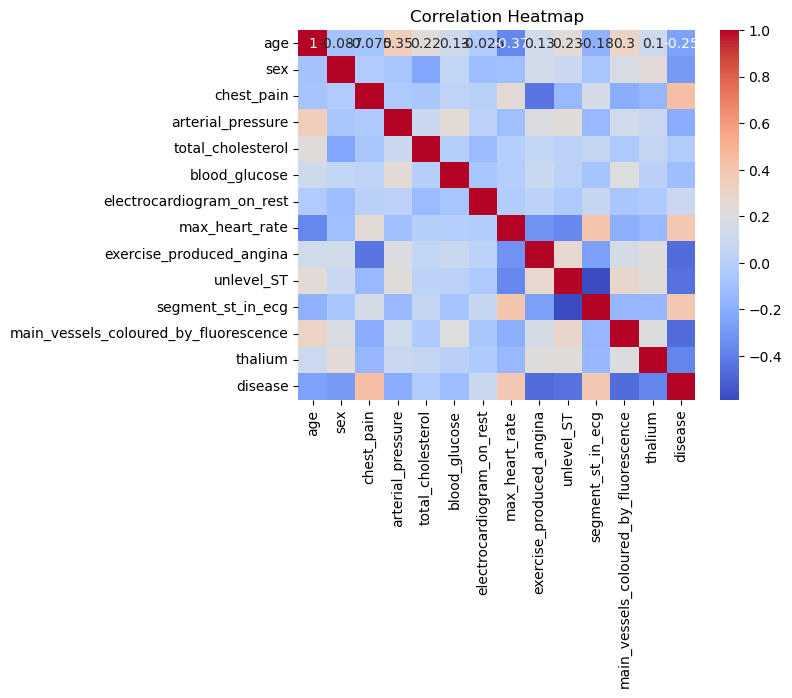

In [11]:
# Correlation Heatmap

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Feature selection

In [12]:
# Select features and target variable
X = df_balanced.drop(columns=['disease'])
y = df_balanced['disease']

# Normalize features if needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Logistic Regression

In [14]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Predict on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[26  3]
 [11 43]]
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        29
           1       0.93      0.80      0.86        54

    accuracy                           0.83        83
   macro avg       0.82      0.85      0.82        83
weighted avg       0.85      0.83      0.83        83

Accuracy: 0.8313253012048193


## Random forest

In [16]:
# Create and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[27  2]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.96      0.85      0.90        54

    accuracy                           0.88        83
   macro avg       0.86      0.89      0.87        83
weighted avg       0.89      0.88      0.88        83

Accuracy: 0.8795180722891566


## KNeighbors

In [18]:
# Create and train the model    
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[27  2]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.96      0.87      0.91        54

    accuracy                           0.89        83
   macro avg       0.88      0.90      0.88        83
weighted avg       0.90      0.89      0.89        83

Accuracy: 0.891566265060241


## Neural Networks

In [20]:
# Create and train the model
nn_model = MLPClassifier(random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

c:\Users\alexa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

In [21]:
# Predict on the test set
y_pred = nn_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[27  2]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.96      0.87      0.91        54

    accuracy                           0.89        83
   macro avg       0.88      0.90      0.88        83
weighted avg       0.90      0.89      0.89        83

Accuracy: 0.891566265060241


## XGBoost Classifier

In [22]:
# Create and train the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

c:\Users\alexa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [23]:
 # Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[27  2]
 [ 9 45]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.96      0.83      0.89        54

    accuracy                           0.87        83
   macro avg       0.85      0.88      0.86        83
weighted avg       0.88      0.87      0.87        83

Accuracy: 0.8674698795180723


## Save the trained model (KNeighbors)

In [24]:
# Save the trained model.

joblib.dump(nn_model, 'modelo_nn.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']